In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import ListedColormap
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
lonmin, lonmax = -180, 180
latmin, latmax = -60, 90
extents = [lonmin, lonmax, latmin, latmax]

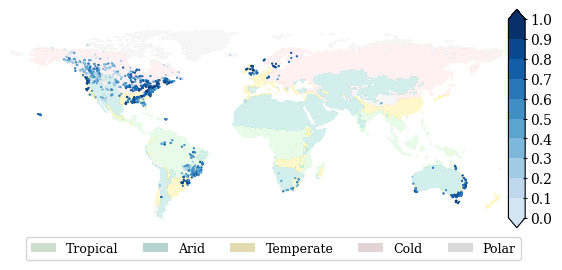

In [2]:
# Plotting Extended Data Fig. 2a
def Figure_E2a():
    data = pd.read_csv(r"dataset\observation_based_approach_result.csv")
    area = data['Area']
    lon = data['Lon']
    lat = data['Lat']
    d1 = np.ravel(data['PET_FAO_YANG_R2'])

    def draw_picture3(ax1, S, title, l, ls):
        ax1.set_global()
        name = r"dataset\stations_shp\Stations.shp"
        shpfile = shpreader.Reader(name)
        shape_feature = cfeature.ShapelyFeature(shpfile.geometries(), crs=ccrs.PlateCarree())
        ax1.add_feature(shape_feature, edgecolor='k', facecolor='#DCDCDC', lw=0, ls=':', alpha=1, zorder=0)

        colorK = plt.get_cmap('Blues')(np.linspace(0, 1, 12))
        colorneed = colorK[[i+2 for i in range(10)]]
        cmap = ListedColormap(colorneed)

        im = plt.scatter(lon, lat, c=d1, s=5, cmap=cmap, vmin=l[0],
                         vmax=l[-1],
                         marker='.', linewidths=0.5)

        ax1.axis('off')
        ax1.set_extent(extents, crs=proj)
        plt.xticks(family='serif')
        plt.yticks(family='serif')

        # Additional operations for drawing "legends"
        c = ['#CCDFCC', '#B6D3D2', '#E2DBB0', '#E2D4D6', '#DADADA']
        alpha = 1
        plt.bar(-999, 0, color=c[0], label="Tropical", alpha=alpha)
        plt.bar(-999, 0, color=c[1], label="Arid", alpha=alpha)
        plt.bar(-999, 0, color=c[2], label="Temperate", alpha=alpha)
        plt.bar(-999, 0, color=c[3], label="Cold", alpha=alpha)
        plt.bar(-999, 0, color=c[4], label="Polar", alpha=alpha)

        plt.title(title, fontsize=12, family='serif', pad=0)

        ax2 = fig.add_axes([0.9, 0.14, 0.03, 0.84])
        cbar = fig.colorbar(im, cax=ax2, extend='both')
        cbar.ax.tick_params(bottom=True, tickdir='inout', pad=2)

        cbar.set_ticks(l)
        cbar.set_ticklabels(ls, family='serif')

        handles, labels = ax1.get_legend_handles_labels()
        return handles, labels

    proj = ccrs.PlateCarree()

    def backround(ax1):
        colors = ['lightgreen', 'lightseagreen', 'gold', 'lightpink', 'lightgrey']
        for k in range(5):
            data_need = np.zeros((bk_data.data[:].shape)) * np.NaN
            d = bk_data.data[:]
            for i in range(360):
                ds = d[i, :]
                ds[ds != k + 1] = np.NaN
                data_need[i, :] = np.copy(ds)
            ax1.contourf(
                bk_data.lon, bk_data.lat, data_need,
                levels=[k + 0.5, k + 1.5],
                colors=[colors[k]] + [colors[k]] + [colors[k]],
                extend='both', alpha=alpha, linewidths=0
            )

    alpha = 0.2

    fig = plt.figure(figsize=(5.6, 2.6))
    bk_data = xr.open_dataset(r"dataset\Beck_KG_5_classifications.nc")
    ax1 = fig.add_subplot(111, projection=proj)
    backround(ax1)
    handles, labels = draw_picture3(ax1, d1, "", [0.0 + 0.1 * i for i in range(11)], [int((0.0 + 0.1 * i)*10)/10 for i in range(11)])

    fig.patch.set_alpha(0)
    legend_font = {
        'family': 'serif',
        'style': 'normal',
        'size': 9,
        'weight': "normal",
    }

    fig.legend(handles, labels, loc='center', bbox_to_anchor=[0.48, 0.06],
               prop=legend_font, ncol=5, markerscale=0.8)
    plt.tight_layout()
    plt.subplots_adjust(
        top=0.965,
        bottom=0.115,
        left=0.01,
        right=0.89,
        hspace=0.135,
        wspace=0.2)
    plt.rcParams['savefig.dpi'] = 2000
    plt.show()
Figure_E2a()

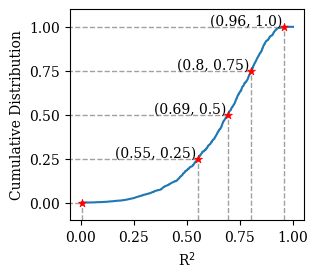

In [3]:
# Plotting Extended Data Fig. 2b
def Figure_E2b():
    data = pd.read_csv(r"dataset\observation_based_approach_result.csv")
    d1 = np.ravel(data['PET_FAO_YANG_R2'])

    fig = plt.figure(figsize=(3.0, 2.6))
    ax = fig.add_subplot(111)
    cum_freq1 = np.cumsum(np.sort(d1)) / d1.sum()

    # Mapping of cumulative distribution
    sd = np.sort(d1)
    sd = np.append(sd, 1)
    cum_freq1 = np.append(cum_freq1, 1)
    ax.plot(sd, cum_freq1, lw=1.5)
    plt.xlabel('R$^2$', fontfamily='serif')
    plt.ylabel('Cumulative Distribution', fontfamily='serif')
    plt.yticks([0, 0.25, 0.50, 0.75, 1.0], ['0.00', '0.25', '0.50', '0.75', '1.00'], fontfamily='serif')
    plt.xticks(fontfamily='serif')
    def lhere(sd, cum_freq1, y=0.25):
        x = sd[cum_freq1 >= y][0]
        plt.plot([-0.1, x], [y, y], ls='--', lw=1.0, color='gray', alpha=0.75)
        plt.plot([x, x], [-0.1, y], ls='--', lw=1.0, color='gray', alpha=0.75)
        plt.scatter(x, y, marker='*', color='r', linewidths=0.5, zorder=10)
        if y == 0:
            pass
        else:
            plt.text(x-0.01, y+0.01, "("+str(np.round(x, 2))+", "+str(np.round(y, 2))+")",
                     ha='right', fontfamily='serif')
    lhere(sd, cum_freq1, 0.00)
    lhere(sd, cum_freq1, 0.25)
    lhere(sd, cum_freq1, 0.5)
    lhere(sd, cum_freq1, 0.75)
    lhere(sd, cum_freq1, 0.999)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.1, 1.1])
    plt.tight_layout()
    plt.subplots_adjust(
        top=0.987,
        bottom=0.176,
        left=0.206,
        right=0.984,
        hspace=0.2,
        wspace=0.2)
    plt.rcParams['savefig.dpi'] = 1000
    fig.patch.set_alpha(0)
    plt.show()
Figure_E2b()